In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# Read the CSV file into a pandas DataFrame
concat_df = pd.read_csv(r"/home/student/GURUPRIYA/clean_concat.csv")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
concat_df['Label'] = label_encoder.fit_transform(concat_df['Label'])

# Suppose your features are stored in X and labels in y
X = concat_df.drop(columns=['Label'])  # Assuming 'Label' is the target column
y = concat_df['Label']

# Scale the features
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(X)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the PCA-transformed data
pca_data = pd.read_csv(r"/home/student/GURUPRIYA/pca_transformed_data.csv")

# Extract features (X) from pca_data_df
X = pca_data
y = concat_df['Label']  # Labels


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# Extract features (X) and labels (y)
X = pca_data.values  # Convert the DataFrame to a numpy array
y = concat_df['Label'].values  # Make sure the labels are a numpy array

# Convert labels to categorical format
y = to_categorical(y, num_classes=4)  # 4 classes for the four stages of cancer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



2024-05-04 10:20:50.574154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
from tensorflow.keras.layers import Dropout

# Define the LSTM model with dropout regularization
model = Sequential([
    LSTM(units=128, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),  # Add dropout regularization with a dropout rate of 0.2
    Dense(units=64, activation='relu'),
    Dropout(0.2),  # Add dropout regularization with a dropout rate of 0.2
    Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
from tensorflow.keras.regularizers import l2

# Define the LSTM model with L2 regularization
model = Sequential([
    LSTM(units=128, input_shape=(1, X_train.shape[1])),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),  # Add L2 regularization with a regularization parameter of 0.01
    Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2024-04-25 14:32:00.092214: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-04-25 14:32:00.531711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 14:32:00.535363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 14:32:00.5

In [9]:
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=50,  # Set a high upper limit for epochs
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
)

Epoch 1/50


2024-04-25 14:34:14.567730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 14:34:14.570280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 14:34:14.572177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

404/404 [==============================] - ETA: 0s - loss: 0.8933 - accuracy: 0.7768

2024-04-25 14:34:51.955788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 14:34:51.958352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 14:34:51.959900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

404/404 [==============================] - 43s 98ms/step - loss: 0.8933 - accuracy: 0.7768 - val_loss: 0.4114 - val_accuracy: 0.8907
Epoch 2/50
404/404 [==============================] - 38s 94ms/step - loss: 0.2399 - accuracy: 0.9474 - val_loss: 0.3409 - val_accuracy: 0.8898
Epoch 3/50
404/404 [==============================] - 34s 83ms/step - loss: 0.1379 - accuracy: 0.9742 - val_loss: 0.3309 - val_accuracy: 0.8855
Epoch 4/50
404/404 [==============================] - 34s 84ms/step - loss: 0.0920 - accuracy: 0.9872 - val_loss: 0.3452 - val_accuracy: 0.8756
Epoch 5/50
404/404 [==============================] - 34s 84ms/step - loss: 0.0665 - accuracy: 0.9938 - val_loss: 0.3669 - val_accuracy: 0.8756
Epoch 6/50
404/404 [==============================] - 35s 86ms/step - loss: 0.0499 - accuracy: 0.9976 - val_loss: 0.4095 - val_accuracy: 0.8641
Epoch 7/50
404/404 [==============================] - 36s 88ms/step - loss: 0.0387 - accuracy: 0.9989 - val_loss: 0.4179 - val_accuracy: 0.8638
Epo

In [ ]:
import numpy as np

# Save training data to CSV
np.savetxt('LSTM_DREG_train_data.csv', X_train_reshaped.reshape(X_train_reshaped.shape[0], -1), delimiter=',')
np.savetxt('LSTM_DREG_train_labels.csv', y_train, delimiter=',')

# Save testing data to CSV
np.savetxt('/path/to/test_data.csv', X_test_reshaped.reshape(X_test_reshaped.shape[0], -1), delimiter=',')
np.savetxt('/path/to/test_labels.csv', y_test, delimiter=',')


In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


101/101 [==============================] - 4s 41ms/step - loss: 1.7103 - accuracy: 0.8295
Test Loss: 1.7103248834609985
Test Accuracy: 0.8294645547866821


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the LSTM model with dropout regularization and L2 regularization
model = Sequential([
    LSTM(units=128, input_shape=(1, X_train.shape[1]), dropout=0.2, recurrent_dropout=0.2),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

2024-05-04 10:20:55.816970: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/50
404/404 [==============================] - 68s 162ms/step - loss: 1.0401 - accuracy: 0.6782 - val_loss: 0.4912 - val_accuracy: 0.8706
Epoch 2/50
404/404 [==============================] - 62s 154ms/step - loss: 0.3907 - accuracy: 0.8863 - val_loss: 0.3889 - val_accuracy: 0.8740
Epoch 3/50
404/404 [==============================] - 63s 157ms/step - loss: 0.2923 - accuracy: 0.9131 - val_loss: 0.3575 - val_accuracy: 0.8830
Epoch 4/50
404/404 [==============================] - 65s 160ms/step - loss: 0.2381 - accuracy: 0.9306 - val_loss: 0.3589 - val_accuracy: 0.8793
Epoch 5/50
404/404 [==============================] - 62s 153ms/step - loss: 0.2148 - accuracy: 0.9336 - val_loss: 0.3600 - val_accuracy: 0.8762
Epoch 6/50
404/404 [==============================] - 62s 154ms/step - loss: 0.1877 - accuracy: 0.9441 - val_loss: 0.3663 - val_accuracy: 0.8737
Epoch 7/50
404/404 [==============================] - 62s 154ms/step - loss: 0.1748 - accuracy: 0.9478 - val_loss: 0.3587 - val_ac

In [12]:
import pandas as pd

# Assume you have already fitted the model and obtained the history object
# history = model.fit(...)

# Convert the history data to a pandas DataFrame
data = {
    'epoch': range(1, len(history.history['loss']) + 1),  # Add epoch numbers
    'training_loss': history.history['loss'],
    'training_accuracy': history.history['accuracy'],
}

df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
csv_file_path = 'LSTM_d_regularisation_training_history.csv'  # Specify the file path and name
df.to_csv(csv_file_path, index=False)  # Save the DataFrame to a CSV file without including the index

print(f"Training history has been saved to {csv_file_path}.")


Training history has been saved to LSTM_d_regularisation_training_history.csv.


In [13]:
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

# Convert true labels to integer class labels
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Predict the labels for the training and testing sets
y_train_pred = model.predict(X_train_reshaped)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred = model.predict(X_test_reshaped)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Generate classification reports for training and testing sets
train_report = classification_report(y_train_classes, y_train_pred_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], output_dict=True)
test_report = classification_report(y_test_classes, y_test_pred_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], output_dict=True)

# Convert the classification reports to DataFrames
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

# Add the class accuracies to the dataframes
train_report_df['accuracy'] = [train_report_df.loc[i]['recall'] for i in train_report_df.index]
test_report_df['accuracy'] = [test_report_df.loc[i]['recall'] for i in test_report_df.index]

# Save the classification reports to CSV files
train_report_df.to_csv("train_report_d_regularisation_LSTM.csv")
test_report_df.to_csv("test_report_d_regularisation_LSTM.csv")

print("Saved the classification reports to 'train_report_the_LSTM.csv' and 'test_report_the_LSTM.csv'.")


101/101 [==============================] - 10s 98ms/step
Saved the classification reports to 'train_report_the_LSTM.csv' and 'test_report_the_LSTM.csv'.


101/101 [==============================] - 10s 101ms/step - loss: 0.3433 - accuracy: 0.8790
Test Loss: 0.34325167536735535
Test Accuracy: 0.878984808921814


/tmp/ipykernel_20444/1722499916.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_loss, "o-", linestyle='dotted', label='Training Loss')


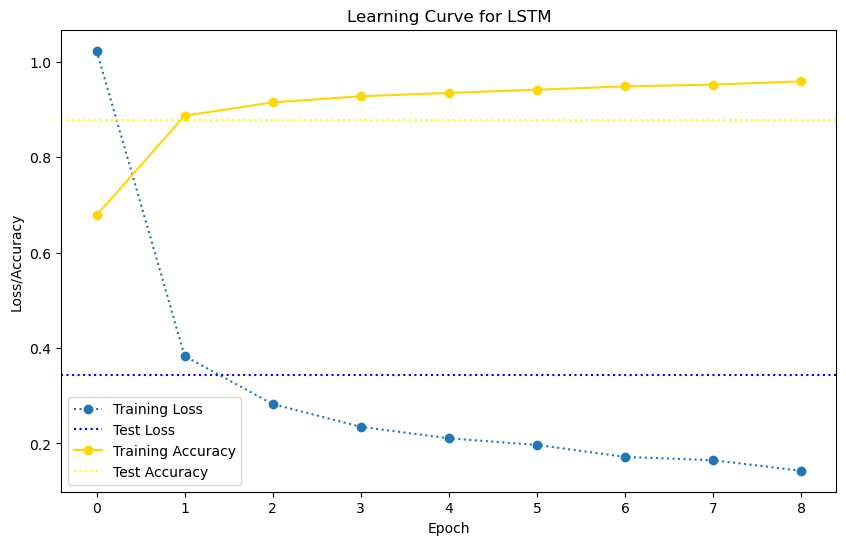

Learning curve saved to lstm_d_regularisation_learning_curve1.svg


<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Assuming you have the training history from fitting the model
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, "o-", linestyle='dotted', label='Training Loss')
plt.axhline(test_loss, color='blue', linestyle='dotted', label='Test Loss')
plt.plot(train_accuracy, "o-", color="gold", label='Training Accuracy')
plt.axhline(test_accuracy, color='yellow', linestyle='dotted', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Learning Curve for LSTM')
plt.legend()
plt.show()

# Save the learning curve as an SVG file
learning_curve_svg_path = 'lstm_d_regularisation_learning_curve1.svg'  # Specify the file path and name
plt.savefig(learning_curve_svg_path, format='svg')
print(f"Learning curve saved to {learning_curve_svg_path}")



101/101 [==============================] - 10s 99ms/step
ROC curve saved to lstm_d_regularisation_roc_curve1.svg


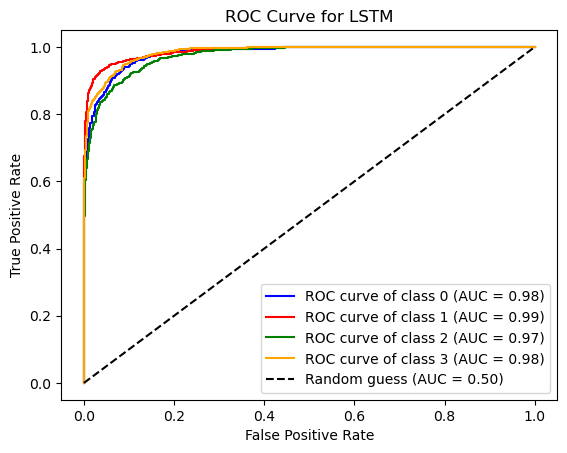

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Convert the test set labels to one-hot encoding
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust class values as needed

# Obtain model predictions (probabilities) on the test set
y_pred_prob = model.predict(X_test_reshaped)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM')
plt.legend()
# Save the roc curve as an SVG file
roc_curve_svg_path = 'lstm_d_regularisation_roc_curve1.svg'  # Specify the file path and name
plt.savefig(roc_curve_svg_path, format='svg')
print(f"ROC curve saved to {roc_curve_svg_path}")

# Display the plot
plt.show()

101/101 [==============================] - 11s 104ms/step - loss: 0.3562 - accuracy: 0.8768
Test Loss: 0.35617896914482117
Test Accuracy: 0.8768182992935181


/tmp/ipykernel_113426/286520794.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_loss, "o-", linestyle='dotted', label='Training Loss')


Learning curve saved to lstm_d_regularisation_learning_curve1.svg


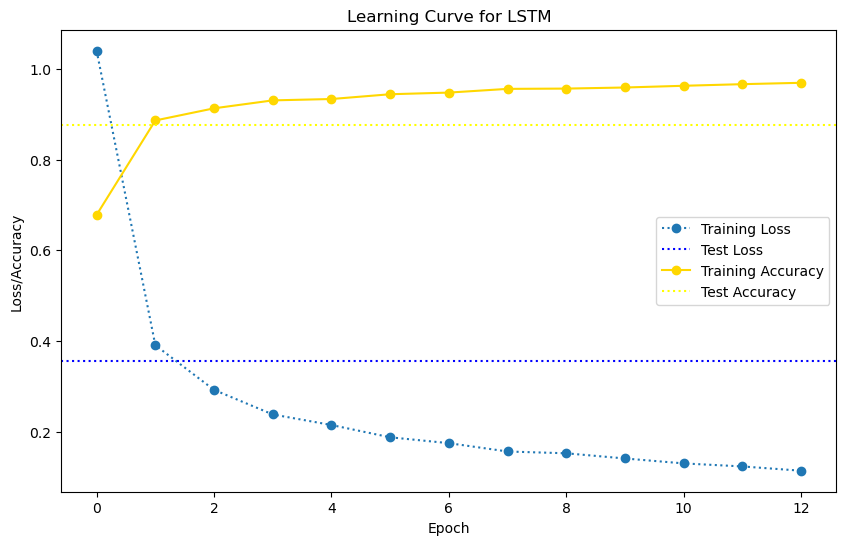

In [7]:
import matplotlib.pyplot as plt

# Assuming you have the training history from fitting the model
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, "o-", linestyle='dotted', label='Training Loss')
plt.axhline(test_loss, color='blue', linestyle='dotted', label='Test Loss')
plt.plot(train_accuracy, "o-", color="gold", label='Training Accuracy')
plt.axhline(test_accuracy, color='yellow', linestyle='dotted', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Learning Curve for LSTM')
plt.legend()
# Save the learning curve as an SVG file
learning_curve_svg_path = 'lstm_d_regularisation_learning_curve1.svg'  # Specify the file path and name
plt.savefig(learning_curve_svg_path, format='svg')
print(f"Learning curve saved to {learning_curve_svg_path}")

# Display the plot
plt.show()